In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.initializers import TruncatedNormal, Constant
#追加train.py
from tensorflow.keras import utils as np_utils
from tensorflow.keras.optimizers import SGD 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator


#alexnet_cifar10.py
def conv2d(filters, kernel_size, strides=(1, 1), padding='same', bias_init=1, **kwargs):
    trunc = TruncatedNormal(mean=0.0, stddev=0.01)
    cnst = Constant(value=bias_init)
    return Conv2D(
        filters, kernel_size, strides=strides, padding=padding,
        activation='relu', kernel_initializer=trunc, bias_initializer=cnst, **kwargs
    )   

def dense(units, activation='tanh'):
    trunc = TruncatedNormal(mean=0.0, stddev=0.01)
    cnst = Constant(value=1)
    return Dense(
        units, activation=activation,
        kernel_initializer=trunc, bias_initializer=cnst,
    )   

def AlexNet(image_size, channel, num_classes):
    model = Sequential()

    #conv1
    model.add(conv2d(96, 3, bias_init=0, input_shape=(image_size, image_size, channel)))
    #pool1
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    #conv2
    model.add(conv2d(256, 5)) 
    #pool2
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    #conv3
    model.add(conv2d(384, 3, bias_init=0))
    #conv4
    model.add(conv2d(384, 3)) 
    #conv5
    model.add(conv2d(256, 3)) 
    #pool5
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    #fc6
    model.add(Flatten())
    model.add(dense(4096))
    model.add(Dropout(0.5))
    #fc7
    model.add(dense(4096))
    model.add(Dropout(0.5))

    #fc8
    model.add(dense(num_classes, activation='softmax'))
    
    return model

#train.py

batch_size = 128 
num_classes = 10
epochs = 100 
image_size = 32
channel = 3 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

model = AlexNet(image_size, channel, num_classes)
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

train_gen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                width_shift_range=4.0/32.0, height_shift_range=4.0/32.0)
test_gen = ImageDataGenerator(rescale=1.0/255)

model.fit_generator(train_gen.flow(x_train, y_train, batch_size, shuffle=True),
                        steps_per_epoch=x_train.shape[0]//batch_size,
                        validation_data=test_gen.flow(x_test, y_test, batch_size, shuffle=False),
                        validation_steps=x_test.shape[0]//batch_size,
                        max_queue_size=5, epochs=epochs)

170508288/170498071 [==============================] - 2s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 96)        2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         8

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
390/390 [==============================] - 82s 127ms/step - loss: 1.9743 - accuracy: 0.2834 - val_loss: 2.1851 - val_accuracy: 0.2221
Epoch 2/100
390/390 [==============================] - 48s 124ms/step - loss: 1.4736 - accuracy: 0.4580 - val_loss: 1.2276 - val_accuracy: 0.5497
Epoch 3/100
390/390 [==============================] - 48s 123ms/step - loss: 1.2689 - accuracy: 0.5388 - val_loss: 1.3214 - val_accuracy: 0.5368
Epoch 4/100
390/390 [==============================] - 48s 123ms/step - loss: 1.1312 - accuracy: 0.5943 - val_loss: 1.4442 - val_accuracy: 0.5198
Epoch 5/100
390/390 [==============================] - 48s 123ms/step - loss: 1.0282 - accuracy: 0.6340 - val_loss: 1.5141 - val_accuracy: 0.5049
Epoch 6/100
390/390 [==============================] - 48s 123ms/step - loss: 0.9559 - accuracy: 0.6592 - val_loss: 1.1642 - val_accuracy: 0.6189
Epoch 7/100
390/390 [==============================] - 48s 123ms/step - loss: 0.8879 - accuracy: 0.6874 - val_loss: 0.8787 -

In [14]:
model.save('alexnet_cifar10.h5')

In [8]:
from keras.models import load_model

model = load_model('alexnet_cifar10.h5')
model.summary()  # As a reminder.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 96)        2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         8

In [9]:
from keras.preprocessing import image
import numpy as np
#ターゲット(画像)へのローカルパス
img_path = "/content/test_00003.png"

#画像を読み込む　:imgはサイズが224*224のPIL画像(Pythonで画像を処理するためのライブラリ)
img = image.load_img(img_path, target_size=(32,32))

#xは形状が(224,224，3)のfloat32型のNumPy配列
x = image.img_to_array(img)

#この配列がサイズが(1,224,224,3)のバッチに変換するために次元を追加
x = np.expand_dims(x, axis=0)

#予測ベクトルを人が読める形にデコード
preds = model.predict(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


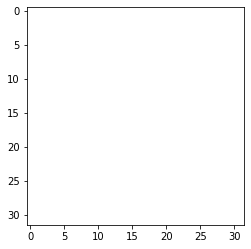

In [12]:
import matplotlib.pyplot as plt

plt.imshow(x[0])
plt.show()

In [13]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:12]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [14]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(x)

In [ ]:
x

In [16]:

import numpy as np
first_layer_activation = activations[11]
print(first_layer_activation.shape)
#preds = first_layer_activation.predict(x)

(1, 4096)


In [ ]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

In [18]:
preds.shape

(1, 10)

In [19]:
preds

array([[1.5428006e-05, 7.7603209e-01, 5.3995440e-04, 1.5739312e-04,
        7.4232899e-05, 1.5846534e-04, 1.4179606e-04, 2.2286402e-01,
        9.9675213e-10, 1.6595284e-05]], dtype=float32)

In [19]:
"""
history = model.fit_generator(train_gen.flow(x_train, y_train, batch_size, shuffle=True),
                        steps_per_epoch=x_train.shape[0]//batch_size,
                        validation_data=test_gen.flow(x_test, y_test, batch_size, shuffle=False),
                        validation_steps=x_test.shape[0]//batch_size,
                        max_queue_size=5, epochs=epochs)
                        """

'\nhistory = model.fit_generator(train_gen.flow(x_train, y_train, batch_size, shuffle=True),\n                        steps_per_epoch=x_train.shape[0]//batch_size,\n                        validation_data=test_gen.flow(x_test, y_test, batch_size, shuffle=False),\n                        validation_steps=x_test.shape[0]//batch_size,\n                        max_queue_size=5, epochs=epochs)\n                        '